# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [72]:
!pip install ydata-profiling -q

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

### **Задание 0**
Для чего фиксируем сиды в домашках?

[Отдаем дань памяти Deep Thought](https://)

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [74]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [x] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [x] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [x] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [x] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [75]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [76]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [77]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


In [78]:
print(df_train.duplicated().any())
print(df_test.duplicated().sum())

True
62


In [79]:
from ydata_profiling import ProfileReport

train_profile = ProfileReport(df_train, title="Train Profiling Report")
train_profile.to_file('Train_Profiling_Report.html')

test_profile = ProfileReport(df_test, title="Test Profiling Report")
test_profile.to_file('Test_Profiling_Report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:00<00:00, 19.55it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:00<00:00, 19.92it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### **Ответы к заданию 1**
**1)** Пропуски есть в столбцах mileage, engine, max_power,  torque, seats, как для обучающей выборки так и для тестовой.

**2)** Дубликаты есть в каждом датасете

**3)** Выводы по дашборду:

- Дубликатов порядка 7%
- Пропусков порядка 3% по столбцам с пропусками
- transmission имеет высокую корреляцию с целевой переменной равную 0.586
- year имеет высокую корреляцию с целевой переменной равную 0.714
- owner можно закодировать как порядковый
- mileage, engine, max_power, torque можно преобразовать к численному очистив от единиц измерения
- torque очень много вариантов записи данных, не очеведино как сделать их однородными



### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [x] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [x] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [x] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [80]:
df_train.describe(include='number')

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [81]:
df_test.describe(include='number')

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [82]:
df_train.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [83]:
df_test.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


### **Ответы к заданию 2**
**1)** median и mean внутри каждого датасета отличаются довольно сильно для призаков selling_price km_driven, что говорит о ассиметрии в распределении значений признаков. Исходя только из этих значений вывод однозначно не сделаешь, может быть как большое количество объектов с большими занчениями призака, либо неочень большое количество но со сверхбольшими занчениями (выбросы). Из графиков дашборда видно, что проблема в выбросах. Если сравнивать занчения между датасетами, то они не сильно различаются, что говорит о похожести выборок.

### **Задание 3 (0.2 балла)**

- [x] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [x] Отобразите такие объекты (0.05 балла)
- [x] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [x]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [84]:
target = 'selling_price'
cols = df_train.columns.difference(['selling_price'])

In [85]:
df_train.duplicated().value_counts()

,count
False,6014
True,985


In [86]:
df_train[df_train.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
326,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6880,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37 kmpl,1461 CC,108.45 bhp,240Nm@ 1750rpm,5.0
6881,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09 kmpl,1248 CC,88.50 bhp,200Nm@ 1750rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [87]:
df_train = df_train.drop_duplicates(subset=cols, keep='first')
df_train = df_train.reset_index(drop=True)

In [88]:
assert df_train.shape == (5840, 13)

In [89]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


### **Ответы к заданию 3**
**1)** 985 - количество всех объектов которые встречаются в выборке более 1 раза

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [x] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [x] Приведите тип данных к ``float``.
* [x] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [90]:
df_train['mileage'].unique()

array(['23.4 kmpl', '21.14 kmpl', '23.0 kmpl', '16.1 kmpl', '20.14 kmpl',
       '17.3 km/kg', '23.59 kmpl', '20.0 kmpl', '19.01 kmpl', '17.3 kmpl',
       '19.3 kmpl', nan, '18.9 kmpl', '18.15 kmpl', '19.7 kmpl',
       '22.54 kmpl', '21.0 kmpl', '25.5 kmpl', '26.59 kmpl', '21.5 kmpl',
       '21.4 kmpl', '24.7 kmpl', '18.2 kmpl', '16.8 kmpl', '24.3 kmpl',
       '14.0 kmpl', '33.44 km/kg', '23.95 kmpl', '17.0 kmpl',
       '20.63 kmpl', '13.93 kmpl', '16.0 kmpl', '17.8 kmpl', '12.55 kmpl',
       '12.99 kmpl', '14.8 kmpl', '13.5 kmpl', '26.0 kmpl', '27.3 kmpl',
       '11.36 kmpl', '17.68 kmpl', '18.53 kmpl', '14.84 kmpl',
       '21.12 kmpl', '20.36 kmpl', '21.27 kmpl', '18.16 kmpl',
       '22.0 kmpl', '25.1 kmpl', '20.51 kmpl', '21.66 kmpl', '25.2 kmpl',
       '22.9 kmpl', '16.02 kmpl', '20.54 kmpl', '22.77 kmpl',
       '15.71 kmpl', '23.1 kmpl', '19.02 kmpl', '19.81 kmpl',
       '26.2 km/kg', '16.47 kmpl', '15.04 kmpl', '18.5 kmpl', '19.1 kmpl',
       '21.79 kmpl', '18.8 kmpl

In [91]:
df_train['engine'].unique()

array(['1248 CC', '1498 CC', '1396 CC', '1298 CC', '1197 CC', '1061 CC',
       '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC', nan,
       '1198 CC', '998 CC', '1591 CC', '2179 CC', '1368 CC', '1497 CC',
       '2982 CC', '2494 CC', '2143 CC', '2477 CC', '2755 CC', '1968 CC',
       '1196 CC', '1373 CC', '1598 CC', '1998 CC', '1086 CC', '1194 CC',
       '1798 CC', '1405 CC', '1582 CC', '999 CC', '2487 CC', '1999 CC',
       '2987 CC', '1995 CC', '1451 CC', '1969 CC', '2967 CC', '2497 CC',
       '1797 CC', '1991 CC', '2362 CC', '1493 CC', '1341 CC', '1199 CC',
       '1794 CC', '1193 CC', '2696 CC', '799 CC', '1495 CC', '1186 CC',
       '1047 CC', '2498 CC', '2523 CC', '1120 CC', '624 CC', '1496 CC',
       '1984 CC', '2354 CC', '793 CC', '1799 CC', '936 CC', '1956 CC',
       '814 CC', '1997 CC', '1948 CC', '2997 CC', '1172 CC', '2489 CC',
       '2499 CC', '2609 CC', '2953 CC', '1150 CC', '1994 CC', '1388 CC',
       '1462 CC', '2956 CC', '1527 CC', '2199 CC', '995 CC', '1599

In [92]:
df_train['max_power'].unique()

array(['74 bhp', '103.52 bhp', '90 bhp', '88.2 bhp', '81.86 bhp',
       '57.5 bhp', '37 bhp', '67.1 bhp', '68.1 bhp', '108.45 bhp',
       '60 bhp', '73.9 bhp', nan, '67 bhp', '82 bhp', '46.3 bhp',
       '88.73 bhp', '64.1 bhp', '98.6 bhp', '88.8 bhp', '83.1 bhp',
       '47.3 bhp', '73.8 bhp', '34.2 bhp', '88.5 bhp', '35 bhp',
       '40.3 bhp', '121.3 bhp', '138.03 bhp', '160.77 bhp', '117.3 bhp',
       '116.3 bhp', '67.05 bhp', '168.5 bhp', '100 bhp', '120.7 bhp',
       '98.63 bhp', '175.56 bhp', '171.5 bhp', '100.6 bhp', '174.33 bhp',
       '187.74 bhp', '170 bhp', '78.9 bhp', '88.76 bhp', '86.8 bhp',
       '108.495 bhp', '108.62 bhp', '93.7 bhp', '103.6 bhp', '98.59 bhp',
       '189 bhp', '67.04 bhp', '68.05 bhp', '58.2 bhp', '82.85 bhp',
       '81.80 bhp', '120 bhp', '94.68 bhp', '160 bhp', '155 bhp',
       '69.01 bhp', '126.32 bhp', '138.1 bhp', '83.14 bhp', '83.8 bhp',
       '126.2 bhp', '62.1 bhp', '86.7 bhp', '188 bhp', '214.56 bhp',
       '177 bhp', '148.31 bhp', 

In [93]:
df_train['torque'].unique()

array(['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm',
       '22.4 kgm at 1750-2750rpm', '11.5@ 4,500(kgm@ rpm)',
       '113.75nm@ 4000rpm', '7.8@ 4,500(kgm@ rpm)', '59Nm@ 2500rpm',
       '170Nm@ 1800-2400rpm', '160Nm@ 2000rpm', '248Nm@ 2250rpm',
       '78Nm@ 4500rpm', nan, '84Nm@ 3500rpm', '115Nm@ 3500-3600rpm',
       '62Nm@ 3000rpm', '219.7Nm@ 1500-2750rpm', '200Nm@ 1750rpm',
       '115Nm@ 4000rpm', '69Nm@ 3500rpm', '172.5Nm@ 1750rpm',
       '6.1kgm@ 3000rpm', '60Nm@ 3500rpm', '90Nm@ 3500rpm',
       '151Nm@ 4850rpm', '104Nm@ 4000rpm', '320Nm@ 1700-2700rpm',
       '250Nm@ 1750-2500rpm', '145Nm@ 4600rpm', '146Nm@ 4800rpm',
       '343Nm@ 1400-3400rpm', '200Nm@ 1400-3400rpm',
       '200Nm@ 1250-4000rpm', '400Nm@ 2000-2500rpm',
       '360Nm@ 1200-3400rpm', '200Nm@ 1200-3600rpm',
       '380Nm@ 1750-2500rpm', '400Nm@ 1750-3000rpm',
       '400Nm@ 1400-2800rpm', '200Nm@ 1750-3000rpm', '111.7Nm@ 4000rpm',
       '219.6Nm@ 1500-2750rpm', '112Nm@ 4000rpm', '250Nm@ 1500-3000rpm',
       '1

In [94]:
# your code here
df_train['mileage'] = df_train['mileage'].apply(lambda x: float(str(x).split()[0])/0.75 if 'km/kg' in str(x) else float(str(x).split()[0]))
df_test['mileage'] = df_test['mileage'].apply(lambda x: float(str(x).split()[0])/0.75 if 'km/kg' in str(x) else float(str(x).split()[0]))

In [95]:
df_train['engine'] = df_train['engine'].apply(lambda x: float(str(x).split()[0]))
df_test['engine'] = df_test['engine'].apply(lambda x: float(str(x).split()[0]))

In [96]:
df_train['max_power'] = df_train['max_power'].apply(lambda x: float(str(x).split()[0]) if str(x).split()[0] != 'bhp' else np.nan) #Так как возникает ошибка из-за ' bhp' заменим ее на np.nan
df_test['max_power'] = df_test['max_power'].apply(lambda x: float(str(x).split()[0]) if str(x).split()[0] != 'bhp' else np.nan)

In [189]:
import re
def parse_torque(value):
    if pd.isna(value):
        return None, None

    value = value.lower().replace(',', '')

    numbers = re.findall(r'\d+\.?\d*', value)
    numbers = [float(num) for num in numbers]

    units = re.findall(r'(?:kgm|nm|rpm)', value)

    torque_value = None
    if 'kgm' in units:
        torque_index = units.index('kgm')
        torque_value = numbers[torque_index] * 9.80665
    elif 'nm' in units:
        torque_index = units.index('nm')
        torque_value = numbers[torque_index]
    elif len(numbers) >= 1 and not any(unit in ['nm', 'kgm'] for unit in units):
        torque_value = numbers[0]

    rpm_value = None
    if 'rpm' in units:
        rpm_index = units.index('rpm')
        rpm_numbers = numbers[rpm_index:]
        rpm_value = max(rpm_numbers)
    elif len(numbers) >= 2 and not any(unit == 'rpm' for unit in units):
        rpm_value = numbers[1]

    return torque_value, rpm_value

In [98]:
df_train['torque_old'] = df_train['torque']
df_test['torque_old'] = df_test['torque']
df_train[['torque', 'max_torque_rpm']] = df_train['torque_old'].apply(lambda x: pd.Series(parse_torque(x)))
df_test[['torque', 'max_torque_rpm']] = df_test['torque_old'].apply(lambda x: pd.Series(parse_torque(x)))
df_train[['torque_old', 'torque', 'max_torque_rpm']].sample(20)

,torque_old,torque,max_torque_rpm
4582,220Nm at 1400-2600 rpm,220.000000,2600.0
177,77Nm@ 3500rpm,77.000000,3500.0
167,115Nm@ 3500-3600rpm,115.000000,3600.0
3722,215Nm@ 1750-2500rpm,215.000000,2500.0
2339,113Nm@ 4500rpm,113.000000,4500.0
1047,402Nm@ 1600-3000rpm,402.000000,3000.0
4676,230Nm@ 1500-2500rpm,230.000000,2500.0
3955,"5.7@ 2,500(kgm@ rpm)",55.897905,2500.0
2534,171Nm@ 1800rpm,171.000000,1800.0
1501,74.5Nm@ 4000rpm,74.500000,4000.0


In [99]:
df_train = df_train.drop(columns=['torque_old'], axis=1)
df_test = df_test.drop(columns=['torque_old'], axis=1)

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [x] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [x] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [x] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [100]:
# your code here
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5654 non-null   float64
 9   engine          5654 non-null   float64
 10  max_power       5656 non-null   float64
 11  torque          5653 non-null   float64
 12  seats           5654 non-null   float64
 13  max_torque_rpm  5650 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 638.9+ KB


In [101]:
num_col = df_train.select_dtypes(include='number').columns
df_train.fillna(df_train[num_col].median(), inplace=True)
df_test.fillna(df_train[num_col].median(), inplace=True)

In [102]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   float64
 10  max_power       5840 non-null   float64
 11  torque          5840 non-null   float64
 12  seats           5840 non-null   float64
 13  max_torque_rpm  5840 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 638.9+ KB


### **Ответы к заданию 5**
**2)** Правильно будет считать медиану, так как среднее подвержено выбросам.


**3)** Правильно считать медиану только по обучающей выборке, чтобы модель ничего не знала о тестовой выборке. Иначе предсказания на тестовой выборке будут лучше чем на новых данных, чего не хотелось бы.

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [x] Осуществите приведение столбцов к необходимому типу.
- [x] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [103]:
# your code here
df_train = df_train.astype({'engine':'int', 'seats':'int'})
df_test = df_test.astype({'engine':'int', 'seats':'int'})
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   int64  
 10  max_power       5840 non-null   float64
 11  torque          5840 non-null   float64
 12  seats           5840 non-null   int64  
 13  max_torque_rpm  5840 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 638.9+ KB


###**Ответы к заданию 6**

**2)** Количество сидений может принимать ограниченное число значений при этом у них есть четкий порядок. Поэтому можно считать данный признак категориальным, аналогично уровню образования или возрасту.


### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [x] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [104]:
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.527912,1429.448973,87.906371,175.357360,5.426712,3045.480822
std,4.095622,5.354320e+05,6.007114e+04,4.171134,485.662834,31.640418,107.145002,0.982344,911.299108
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,47.071920,2.000000,1400.000000
25%,2011.000000,2.500000e+05,3.900000e+04,17.000000,1197.000000,68.000000,111.800000,5.000000,2250.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.400000,1248.000000,81.860000,160.000000,5.000000,3000.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.320000,1498.000000,99.000000,200.055660,5.000000,4000.000000
max,2020.000000,1.000000e+07,2.360457e+06,44.586667,3604.000000,400.000000,1863.263500,14.000000,21800.000000


In [105]:
df_test.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.401710,1454.87600,90.841670,177.617377,5.403000,3091.237200
std,4.012149,7.585539e+05,48486.218662,4.056234,521.99574,34.893389,103.734516,0.912921,882.601859
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.00000,34.200000,48.000000,4.000000,11.200000
25%,2011.000000,2.500000e+05,37000.000000,16.587500,1197.00000,69.000000,111.700000,5.000000,2500.000000
50%,2014.000000,4.349990e+05,61500.000000,19.400000,1248.00000,82.425000,160.000000,5.000000,3000.000000
75%,2017.000000,6.700000e+05,100000.000000,22.320000,1582.00000,102.000000,205.000000,5.000000,4000.000000
max,2020.000000,6.000000e+06,375000.000000,43.013333,3604.00000,280.000000,1421.964250,9.000000,5200.000000


###**Ответы к заданию 7**

**1)** На обучающей выборке статистки поменялись еще в тот момент когда мы удалили дубли. Но если отбросить это факт, то мы дожны увидеть изминение только по mean и std, 25%, 75%, а медианное значение должно остаться без изминений. Фактически на тестовой выборке, где мы не удаляли дубли мы наблюдаем изминение только mean и std

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [x] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [x] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [x] Постройте pairplot по тестовым данным
- [x] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

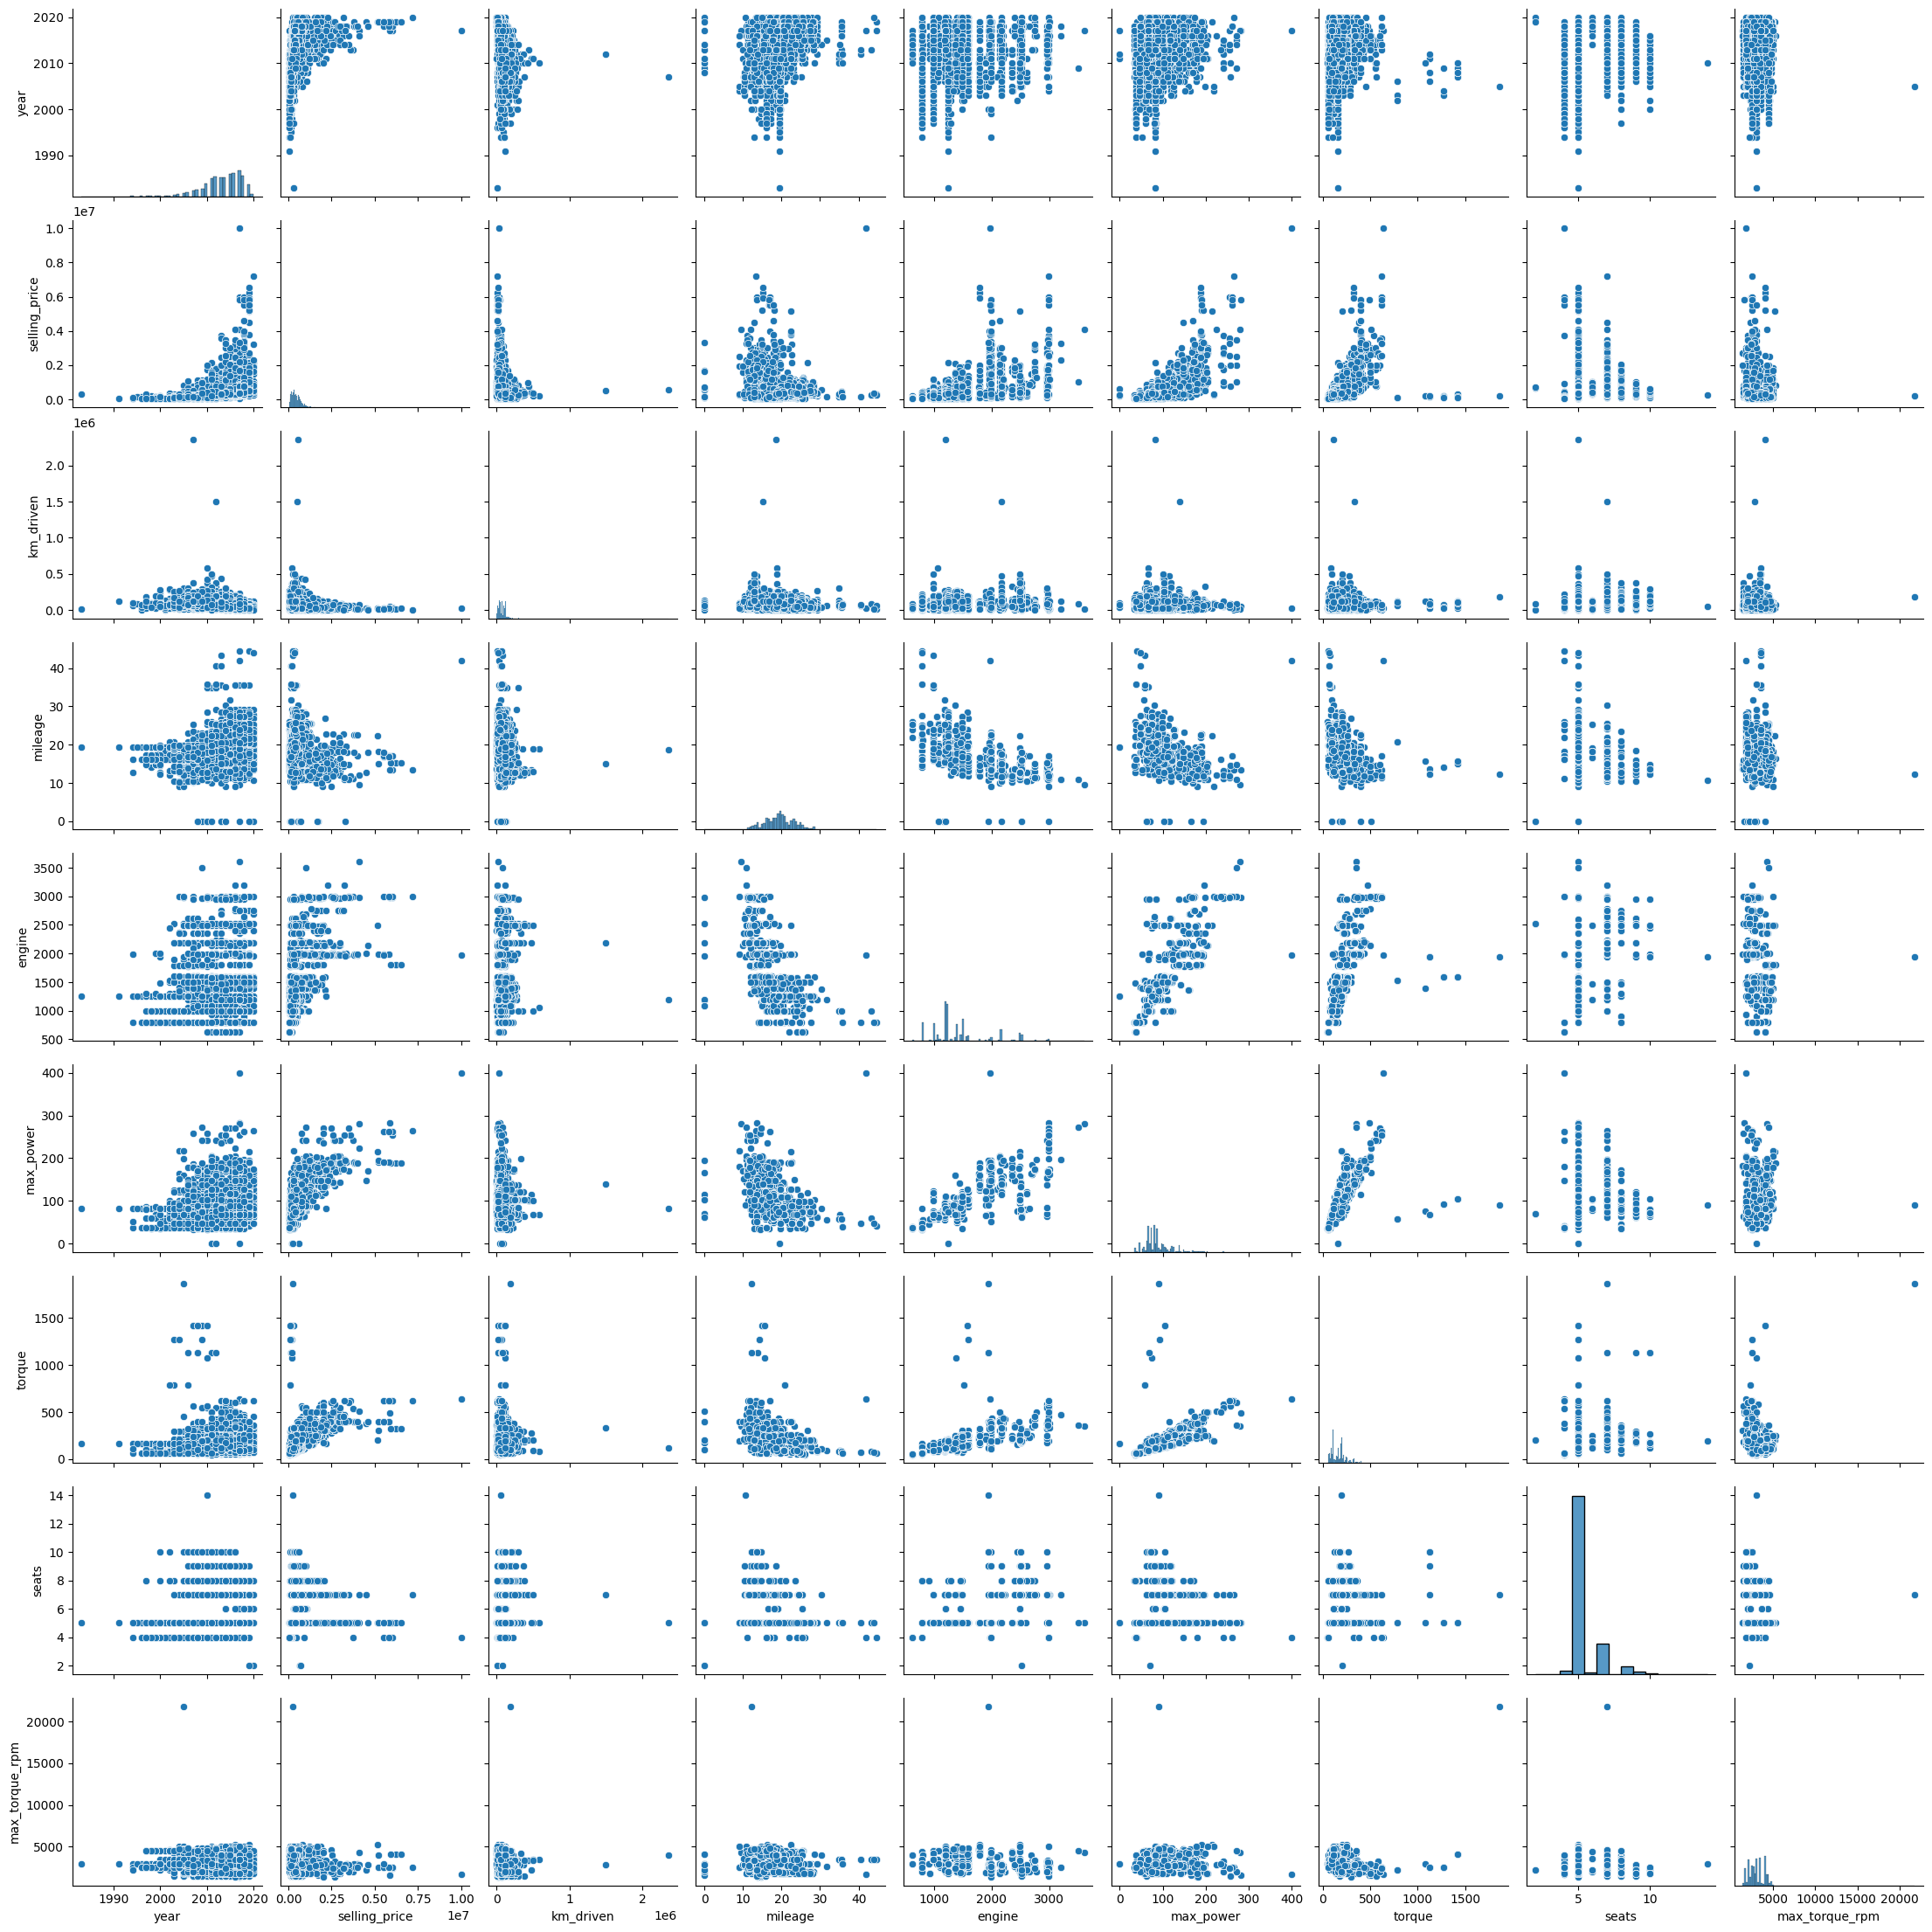

In [106]:
# your code here
sns.pairplot(df_train)

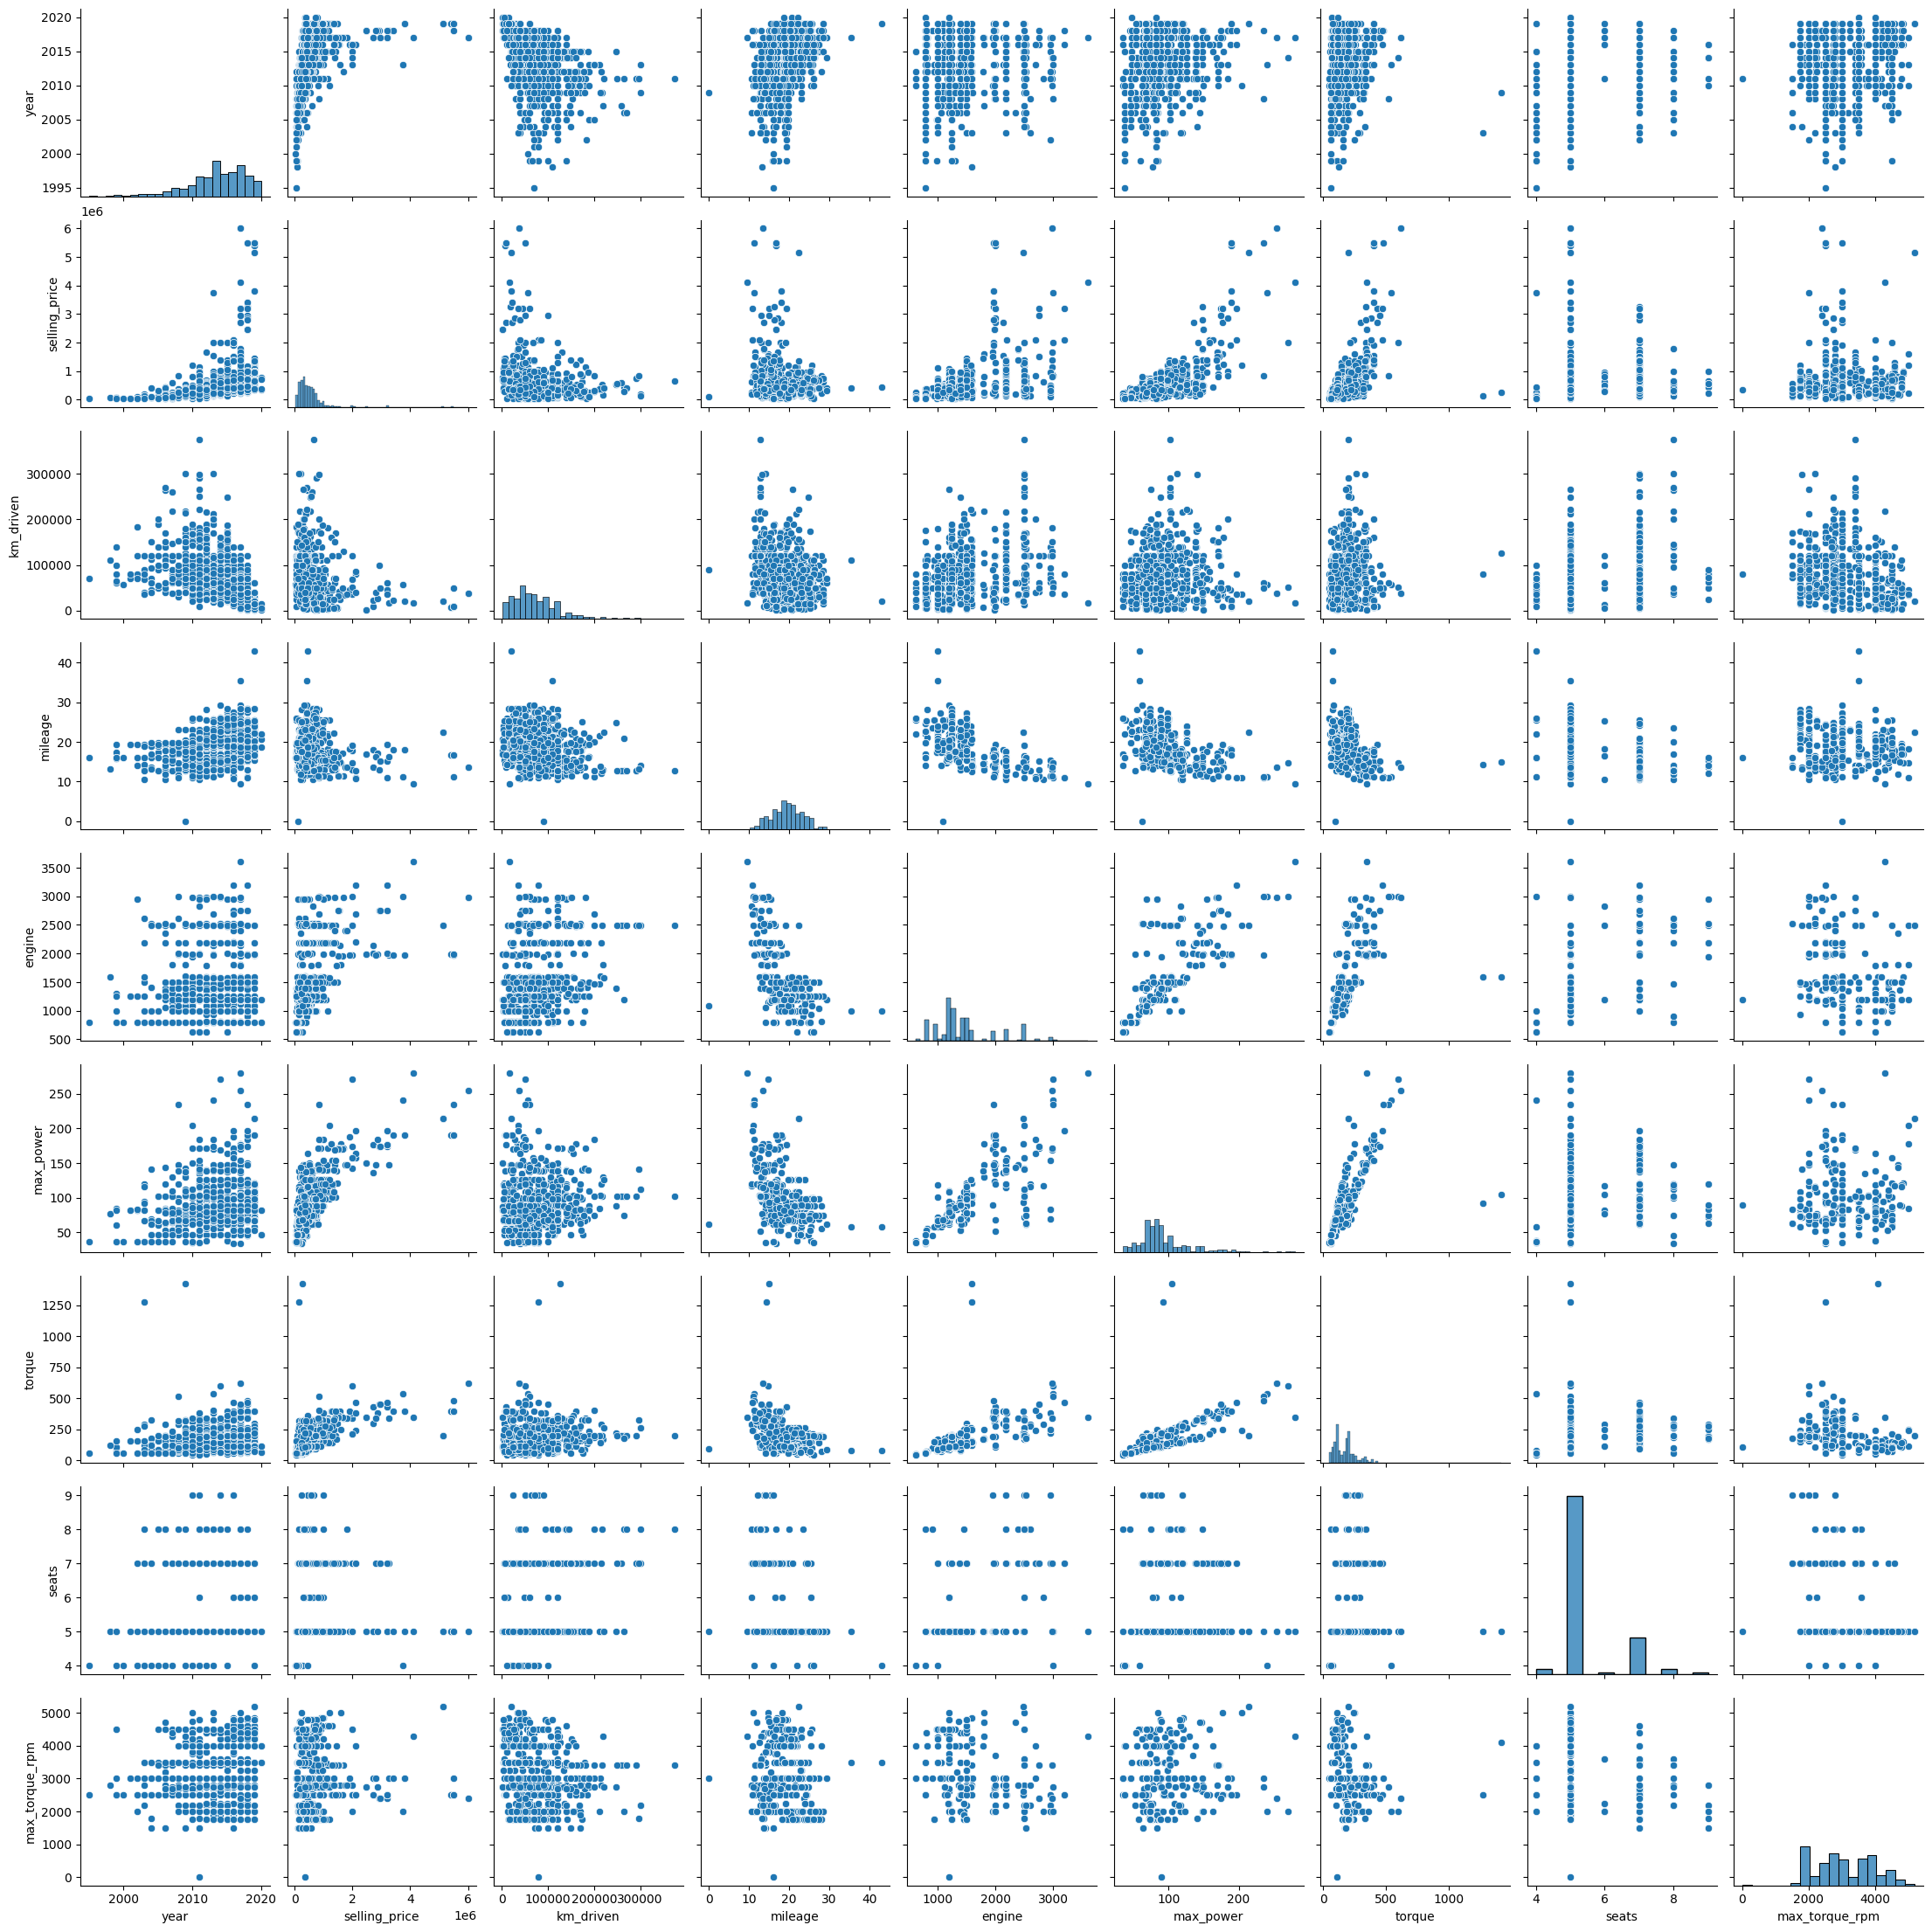

In [107]:
sns.pairplot(df_test)

###**Ответы к заданию 8**

- Можно ли предположить на основе распределений связь признаков с целевой переменной?

    ***Да, можно. Из графиков распределения видно что есть положительная корреляция целевой переменной с year, max_power, torque, engine.***
- Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

    ***Да, можно. Сильно коррелируют признаки (max_power, torque), (engine, torque). У (mileage, engine) отрицательная корреляция***

- Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

    ***В трейне наблюадется чуть больше выбросов, в востальном взуально распределени похожи.***

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [x] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [x] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

<Axes: >

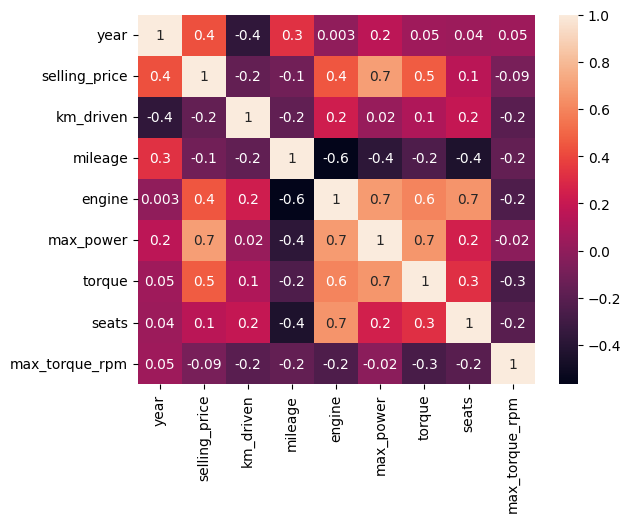

In [108]:
# your code here
corr_train = df_train.select_dtypes(include='number').corr()
sns.heatmap(corr_train, fmt='.1g', annot=True)

- [x] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

###**Ответы к заданию 9**

 - Какие 2 признака наименее скоррелированы между собой?

    ***(year, engine) корреляция равна  0.003***
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
  
    ***(max_power, engine) корреляция равна  0.7***

    ***(max_power, torque) корреляция равна  0.7***

    ***(seats, engine) корреляция равна  0.7***
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
  
    *** ***

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ]

Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [109]:
def corr_spearman(X, Y):
  def compute_ranks(values):
    if not all(isinstance(x, (int, float, np.number)) for x in values):
            raise TypeError("Все значения должны быть числами (int, float или numpy.number)")

    indexed = [(val, i) for i, val in enumerate(values)]
    indexed.sort()
    ranks = [0] * len(values)
    current_rank = 1
    n = len(indexed)
    i = 0

    while i < n:
        j = i
        while j < n and indexed[j][0] == indexed[i][0]:
            j += 1
        avg_rank = (current_rank + j - 1) / 2

        for k in range(i, j):
            original_index = indexed[k][1]
            ranks[original_index] = avg_rank

        current_rank = j
        i = j

    return ranks
  if not isinstance(X, (list, tuple, np.ndarray)) or not isinstance(Y, (list, tuple, np.ndarray)):
    raise TypeError("X и Y должны быть списками или кортежами или np.ndarray")
  if len(X) != len(Y):
      raise ValueError("X и Y должны иметь одинаковую длину")

  X = compute_ranks(X)
  Y = compute_ranks(Y)
  d2 = [(x - y)**2 for x, y in zip(X, Y)]
  corr = 1 - 6*(sum(d2))/(len(d2)*(len(d2)**2-1))
  return corr

corr_spearman(df_train['year'].values, df_train['selling_price'].values)

0.7081464536263

In [110]:
df_train.select_dtypes(include='int').corr(method='spearman')

,year,selling_price,km_driven,engine,seats
year,1.000000,0.707123,-0.569659,-0.038056,0.048291
selling_price,0.707123,1.000000,-0.295665,0.463577,0.317605
km_driven,-0.569659,-0.295665,1.000000,0.304504,0.195317
engine,-0.038056,0.463577,0.304504,1.000000,0.527716
seats,0.048291,0.317605,0.195317,0.527716,1.000000


In [111]:
!pip install -q phik

`Your answer here`

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [112]:
# your code here

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [113]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.000000,5,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.000000,5,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,219.668960,5,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,112.776475,5,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.750000,5,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,96.100000,5,3000.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,90.000000,5,3500.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.700000,5,4000.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,235.359600,5,2750.0


In [114]:
cols_num = ['km_driven', 'mileage', 'max_power', 'torque', 'seats', 'max_torque_rpm']
df_train_num = df_train[cols_num]
df_test_num = df_test[cols_num]

y_train = df_train['selling_price'] # your code here
X_train = df_train_num # your code here
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   km_driven       5840 non-null   int64  
 1   mileage         5840 non-null   float64
 2   max_power       5840 non-null   float64
 3   torque          5840 non-null   float64
 4   seats           5840 non-null   int64  
 5   max_torque_rpm  5840 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 273.9 KB


In [115]:
assert X_train.shape == (5840, 6)

In [116]:
y_test = df_test['selling_price'] # your code here
X_test = df_test_num # your code here

In [117]:
assert X_test.shape == (1000, 6)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [x] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [x] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE, root_mean_squared_error as RMSE

# your code here
model = LinearRegression()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
pred_test_LR = pred_test

print(f'Train r2_score: {r2_score(y_train, pred_train)}')
print(f'Test r2_score: {r2_score(y_test, pred_test)}')
print(f'Train MSE: {MSE(y_train, pred_train)}')
print(f'Test MSE: {MSE(y_test, pred_test)}')
print(f'Train RMSE: {RMSE(y_train, pred_train)}')
print(f'Test RMSE: {RMSE(y_test, pred_test)}')

Train r2_score: 0.5401887059281645
Test r2_score: 0.569311224875769
Train MSE: 131799545290.94046
Test MSE: 247572206534.35248
Train RMSE: 363042.07096552936
Test RMSE: 497566.2835586355


###**Ответы к заданию 12**

**2)** MSE на тесте почти в 2 раза больше чем на обучающей выборке, что говорит о переобучении. R2 больше 0, следовательно, модель предсказывает лучше чем пресказание константного значение равному среднему по выборке. При этом R2 на тестовой больше чем на трейне, что странно учитывая, что модель переобучилась.

### **Задание 13 (0.15 балла)**

- [x] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [119]:
def my_r2_score(y_true, y_pred):
  y_true = np.array(y_true)
  y_pred = np.arrayaaa(y_pred)

  if len(y_true) != len(y_pred):
    raise ValueError('Размеры входных массивов волжны совпадать.')

  y_mean = np.mean(y_true)
  sum_t_p = np.sum(y_true - y_pred)
  sum_t_m = np.sum(y_true - y_mean)
  return 1 - (sum_t_p**2 / sum_t_m**2)

$$
R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
$$

Где:
- $ y_i $ — истинные значения,
- $ \hat{y}_i $ — предсказанные значения,
- $ \bar{y} $ — среднее значение истинных значений.

### **Бонус (0.15 балла)**

- [x] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [x] Объясните, когда применяется $\text{adjusted}-R^2$?

In [120]:
# your code here
def my_adj_r2_score(y_true, y_pred, n, p):

  r2 = my_r2_score(y_true, y_pred)
  adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

###**Ответы к заданию 13**

**2)** $adjusted - R^2$ применяться, когда необходимо стравнить модели с разным количеством признаков, оценить значимость новых признаков, для отбора зачимых признаков в целях борьбы с переобучением

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [x] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [121]:
from sklearn.preprocessing import StandardScaler

# your code here
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [122]:
model = LinearRegression()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
pred_test_LR_scaled = pred_test

print(f'Train r2_score: {r2_score(y_train, pred_train)}')
print(f'Test r2_score: {r2_score(y_test, pred_test)}')
print(f'Train MSE: {MSE(y_train, pred_train)}')
print(f'Test MSE: {MSE(y_test, pred_test)}')
print(f'Train RMSE: {RMSE(y_train, pred_train)}')
print(f'Test RMSE: {RMSE(y_test, pred_test)}')

Train r2_score: 0.5401887059281646
Test r2_score: 0.5693112248757696
Train MSE: 131799545290.94043
Test MSE: 247572206534.35214
Train RMSE: 363042.0709655293
Test RMSE: 497566.28355863516


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [x] Какой признак оказался наиболее информативным в предсказании цены?

In [123]:
# your code here
pd.DataFrame(model.coef_, index=X_train.columns)

,0
km_driven,-98022.194935
mileage,79301.286618
max_power,396063.191503
torque,-1189.947112
seats,29396.467597
max_torque_rpm,-40626.937482


###**Ответы к заданию 15**

**1)** Самым информатимным оказался **max_power**

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [x] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [x] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [124]:
from sklearn.linear_model import Lasso

# your code here
model = Lasso(alpha=1)
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
pred_test_Lasso = pred_test

print(f'Train r2_score: {r2_score(y_train, pred_train)}')
print(f'Test r2_score: {r2_score(y_test, pred_test)}')
print(f'Train MSE: {MSE(y_train, pred_train)}')
print(f'Test MSE: {MSE(y_test, pred_test)}')
print(f'Train RMSE: {RMSE(y_train, pred_train)}')
print(f'Test RMSE: {RMSE(y_test, pred_test)}')

Train r2_score: 0.5401887058771608
Test r2_score: 0.5693103155728668
Train MSE: 131799545305.56006
Test MSE: 247572729227.62637
Train RMSE: 363042.0709856642
Test RMSE: 497566.80880825076


In [125]:
pd.DataFrame(model.coef_, index=X_train.columns)

,0
km_driven,-98021.214701
mileage,79299.259627
max_power,396059.265616
torque,-1185.912569
seats,29394.364377
max_torque_rpm,-40625.496932


###**Ответы к заданию 16**

**2)** Lasso не занулила признаки, и в целом слабо повлияла на веса. Вероятно потому, что все признаки занчимы.

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [x] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [x] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [126]:
# your code here
from sklearn.model_selection import GridSearchCV

param = {
    'alpha': [0.0001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
}

gs = GridSearchCV(Lasso(), param, scoring='r2', cv=10)
gs.fit(X_train, y_train)

print(gs.best_params_)
print(gs.best_score_)

{'alpha': 10000}
0.48408796036658713


In [127]:
pd.DataFrame(gs.best_estimator_.coef_, index=X_train.columns)

,0
km_driven,-86856.692769
mileage,59826.372194
max_power,381779.958221
torque,0.000000
seats,12961.306057
max_torque_rpm,-34867.274758


In [128]:
model = Lasso(alpha=10000)
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
pred_test_Lasso_best = pred_test

print(f'Train r2_score: {r2_score(y_train, pred_train)}')
print(f'Test r2_score: {r2_score(y_test, pred_test)}')
print(f'Train MSE: {MSE(y_train, pred_train)}')
print(f'Test MSE: {MSE(y_test, pred_test)}')
print(f'Train RMSE: {RMSE(y_train, pred_train)}')
print(f'Test RMSE: {RMSE(y_test, pred_test)}')

Train r2_score: 0.5378839267783906
Test r2_score: 0.5599348864625154
Train MSE: 132460183356.71358
Test MSE: 252961993601.62027
Train RMSE: 363950.7979888402
Test RMSE: 502953.2717873702


**Ваша задача 2:**

- [x] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [x] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [129]:
# your code here
from sklearn.linear_model import ElasticNet

param = {
    'alpha': [0.0001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
}

gs = GridSearchCV(ElasticNet(), param, scoring='r2', cv=10)
gs.fit(X_train, y_train)

print(gs.best_params_)
print(gs.best_score_)

{'alpha': 1, 'l1_ratio': 0.9}
0.4860457493670015


In [130]:
pd.DataFrame(gs.best_estimator_.coef_, index=X_train.columns)

,0
km_driven,-92135.432005
mileage,57616.758299
max_power,331946.506600
torque,35998.217705
seats,22061.132069
max_torque_rpm,-32521.063584


In [131]:
model = ElasticNet(alpha=1, l1_ratio=0.9)
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
pred_test_Lasso_best = pred_test

print(f'Train r2_score: {r2_score(y_train, pred_train)}')
print(f'Test r2_score: {r2_score(y_test, pred_test)}')
print(f'Train MSE: {MSE(y_train, pred_train)}')
print(f'Test MSE: {MSE(y_test, pred_test)}')
print(f'Train RMSE: {RMSE(y_train, pred_train)}')
print(f'Test RMSE: {RMSE(y_test, pred_test)}')

Train r2_score: 0.5324568549211826
Test r2_score: 0.5395239108796892
Train MSE: 134015790216.0125
Test MSE: 264694805215.06787
Train RMSE: 366081.6715106241
Test RMSE: 514484.9902718911


###**Ответы к заданию 16**

**Задача 1)**

 Ответьте на вопросы:
- Сколько грид-сёрчу пришлось обучать моделей?

    9*10 = 100 моделей обучил GSCV
- Что значит каждый параметр param_grid, который вы заполняли для GridSearch?

    коэффициент alpha отвечает за размер штрафа
- Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

    alpha = 10_000, занунлился вес для признака torque

**Задача 2)**

- Сколько грид-сёрчу пришлось обучать моделей?

   $9*6*10 = 540$
- Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

    **alpha = 1**
    
    **l1_ratio = 0.9**

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [x] Реализуйте модель с $L0$-регуляризаицей.
- [x] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [x] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [132]:
import itertools


from sklearn.base import BaseEstimator
class LO_LinearRegression(BaseEstimator):
  def __init__(self, max_features=None):
    self.coef_ = None
    self.intercept_ =  None
    self.best_score_ = None
    self.max_features = max_features

  def fit(self, X, y, verbose=0):
    X = np.array(X)
    y = np.array(y)
    best_score = np.inf
    best_features_ = None
    n_features = X.shape[1]

    best_coef = np.zeros(n_features)
    max_k = n_features if self.max_features is None else self.max_features

    for k in range(1, max_k + 1):
      for features_comb in itertools.combinations(range(n_features), k):
        X_comb = X[:, features_comb]

        model = LinearRegression()
        model.fit(X_comb, y)
        pred = model.predict(X_comb)

        score = MSE(y, pred)

        coef = np.zeros(n_features)
        coef[list(features_comb)] = model.coef_

        if score < best_score:
          best_score = score
          best_coef = coef
          best_features = list(features_comb)
          best_intercept = model.intercept_

        if verbose == 1:
          print(f"Processing combination: {features_comb}, Score: {score}")
    self.coef_ = best_coef
    self.intercept_ = best_intercept
    self.best_score_ = best_score
    self.best_features_ = best_features

  def predict(self, X):
    if self.coef_ is None:
      raise ValueError('Модель не обучена. Сначала примените метод fit')

    X = np.array(X)
    return X @ self.coef_ + self.intercept_

In [133]:
# your code here
model = LO_LinearRegression(max_features=1)
model.fit(X_train, y_train, verbose=0)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
pred_test_L0 = pred_test

print(f'Train r2_score: {r2_score(y_train, pred_train)}')
print(f'Test r2_score: {r2_score(y_test, pred_test)}')
print(f'Train MSE: {MSE(y_train, pred_train)}')
print(f'Test MSE: {MSE(y_test, pred_test)}')
print(f'Train RMSE: {RMSE(y_train, pred_train)}')
print(f'Test RMSE: {RMSE(y_test, pred_test)}')
print(f'coef: {model.coef_}')

Train r2_score: 0.47999126828565986
Test r2_score: 0.5127654012878643
Train MSE: 149054438790.1905
Test MSE: 280076360634.77405
Train RMSE: 386075.6904937042
Test RMSE: 529222.4113118927
coef: [     0.              0.         370923.03725665      0.
      0.              0.        ]


###**Ответы к заданию 16**

**Задача 1)**

- Проанализируйте результаты обучения

    Экперементы показали, что даже с 1 признаком у модели качество падает не сильно, но все же наилучшее качество со всеми признаками. Почти все доступную информацию о целевой переменной можно получить из признака max_power.

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [x] Предобработайте столбец `name`, чтобы избежать его удаления

In [134]:
# your code here
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.000000,5,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.000000,5,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,219.668960,5,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,112.776475,5,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.750000,5,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,96.100000,5,3000.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,90.000000,5,3500.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.700000,5,4000.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,235.359600,5,2750.0


In [135]:
cat_cols = ['name', 'fuel', 'seller_type', 'transmission', 'owner']
df_train_cat = df_train[cat_cols]
df_train_cat["name"] = df_train_cat["name"].apply(lambda x: x.split()[0])
df_test_cat = df_test[cat_cols]
df_test_cat["name"] = df_test_cat["name"].apply(lambda x: x.split()[0])

X_train_cat = pd.concat([X_train, df_train_cat], axis=1)
X_test_cat = pd.concat([X_test, df_test_cat], axis=1)

<ipython-input-135-43e567c1a439>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_cat["name"] = df_train_cat["name"].apply(lambda x: x.split()[0])
<ipython-input-135-43e567c1a439>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_cat["name"] = df_test_cat["name"].apply(lambda x: x.split()[0])


In [136]:
assert X_train_cat.shape == (5840, 11)

### **Задание 20 (0.1 балла)**

- [x] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [137]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown='ignore', drop="first"), ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']),
        ("num", StandardScaler(), ['km_driven', 'mileage', 'max_power', 'torque', 'max_torque_rpm'])
    ]
)
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')


X_train_cat = preprocessor.fit_transform(X_train_cat)
X_test_cat= preprocessor.transform(X_test_cat)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

###**Ответы к заданию 16**

**Ответы на вопросы)**


* Как корректно работать с OHE преобразованием?

    Важно чтобы кодирование на тесте было такое же как и на тесте. Также нужно удалить один стобец для каждого исходного признака, так эта информация уже содержится остальных столбцах -> полная корреляция между признаками. Если есть полная корреляция, то для линейной регрессии есть бесконечно много решений поставленной задачи, и веса модели могут убежать в бесконечноть и будет расти ошибка округления из-за особеностей записи числа в компьтере.

* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

    Да, корректно. Это уменьшит сложность модели и оптимизирует вычисления. Ни к чему плохому это не должно привести.

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [x] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [x] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [138]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param = {
    'alpha': [0.0001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
}

gs = GridSearchCV(Ridge(), param, scoring='r2', cv=10)
gs.fit(X_train_cat, y_train)

print(gs.best_params_)
print(gs.best_score_)

{'alpha': 1}
0.6359445599956339


In [139]:
model = Ridge(alpha=1)
model.fit(X_train_cat, y_train)
pred_train = model.predict(X_train_cat)
pred_test = model.predict(X_test_cat)
pred_test_Ridge = pred_test

print(f'Train r2_score: {r2_score(y_train, pred_train)}')
print(f'Test r2_score: {r2_score(y_test, pred_test)}')
print(f'Train MSE: {MSE(y_train, pred_train)}')
print(f'Test MSE: {MSE(y_test, pred_test)}')
print(f'Train RMSE: {RMSE(y_train, pred_train)}')
print(f'Test RMSE: {RMSE(y_test, pred_test)}')
print(f'coef: {model.coef_}')

Train r2_score: 0.7244629530665758
Test r2_score: 0.7593060030875498
Train MSE: 78979481289.03572
Test MSE: 138357782596.02795
Train RMSE: 281032.8829319368
Test RMSE: 371964.75988462666
coef: [ 3.60137238e+05  9.23020653e+05 -5.14416811e+05 -3.75231378e+05
 -4.54148518e+05 -4.86574921e+05 -2.31794239e+05 -3.99787887e+05
 -4.61648116e+05 -3.88761218e+05  1.76828848e+05  5.75542708e+05
  2.05247710e+05  6.86423587e+04  1.00159331e+06  1.48125794e+06
  2.46836739e+05 -4.04554823e+05 -3.88353537e+05  5.72847144e+05
 -2.18254860e+05 -3.94897055e+05 -2.87644197e+05 -4.10952614e+05
 -4.39568630e+05 -5.11336512e+05 -1.13488212e+05 -4.31354813e+05
  1.59442031e+06  2.02023177e+05  1.17068108e+05  1.92175795e+05
 -7.28571674e+04  2.48486719e+04 -1.42631076e+05 -2.22022094e+05
 -1.39350652e+05  2.60122805e+06 -1.71353663e+05 -2.71917622e+04
 -2.54086285e+05 -2.08815532e+05 -6.15106670e+04 -1.20246874e+05
  6.01470496e+03  6.92707093e+03 -1.12980756e+05 -6.41139674e+04
  9.16440956e+04  2.5496901

###**Ответы к заданию 22**

**Ответы на вопросы**

- Ответье на вопрос: Удалось ли улучшить качество прогнозов?

    Удалось! Качество всех метрик возросло

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [140]:
# your code here

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [x] Реализуйте метрику `business_metric`
- [x] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [141]:
def business_metrics(y_true, y_pred):
  # your code here
  within_10_percent = np.abs(y_true - y_pred) <= 0.1 * y_true
  metric = np.mean(within_10_percent)

  return metric

pred_models = [pred_test_LR, pred_test_LR_scaled, pred_test_Lasso, pred_test_Lasso_best, pred_test_L0, pred_test_Ridge]
for pred in pred_models:
  print(business_metrics(y_test, pred))


0.185
0.185
0.185
0.176
0.154
0.208


###**Ответы к заданию 23**

    Лучше всего себя показывает последная модель, которая учитывает категориальные признаки.

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [x] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [x] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [142]:
def your_business_metrics(y_true, y_pred, alpha=1):
  err = (y_true - y_pred)
  err = np.where(err >= 0, alpha*err, err)
  within_10_percent = np.abs(err) <= 0.1 * y_true
  metric = np.mean(within_10_percent)
  return metric

for pred in pred_models:
  print(your_business_metrics(y_test, pred, alpha=5))

0.102
0.102
0.102
0.092
0.08
0.114


###**Ответы к заданию 23**

    Лучше всего себя показывает последная модель Ridge, которая категориальные признаки.

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [182]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

df_train = df_train.drop_duplicates(subset=cols, keep='first')
df_train = df_train.reset_index(drop=True)

In [226]:
%%writefile utils.py
import re
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class Parser(BaseEstimator, TransformerMixin):
    @staticmethod
    def parse_torque(value):
      if pd.isna(value):
          return None, None

      value = value.lower().replace(',', '')

      numbers = re.findall(r'\d+\.?\d*', value)
      numbers = [float(num) for num in numbers]

      units = re.findall(r'(?:kgm|nm|rpm)', value)

      torque_value = None
      if 'kgm' in units:
          torque_index = units.index('kgm')
          torque_value = numbers[torque_index] * 9.80665
      elif 'nm' in units:
          torque_index = units.index('nm')
          torque_value = numbers[torque_index]
      elif len(numbers) >= 1 and not any(unit in ['nm', 'kgm'] for unit in units):
          torque_value = numbers[0]

      rpm_value = None
      if 'rpm' in units:
          rpm_index = units.index('rpm')
          rpm_numbers = numbers[rpm_index:]
          rpm_value = max(rpm_numbers)
      elif len(numbers) >= 2 and not any(unit == 'rpm' for unit in units):
          rpm_value = numbers[1]

      return torque_value, rpm_value
    def fit(self, X, y=None):
        X = X.copy()
        num_col = ['torque', 'mileage', 'engine', 'max_power', 'max_torque_rpm', 'seats']
        num_col = ['torque', 'mileage', 'engine', 'max_power', 'max_torque_rpm', 'seats']
        X['mileage'] = X['mileage'].apply(lambda x: float(str(x).split()[0])/0.75 if 'km/kg' in str(x) else float(str(x).split()[0]))
        X['engine'] = X['engine'].apply(lambda x: float(str(x).split()[0]))
        X['max_power'] = X['max_power'].apply(lambda x: float(str(x).split()[0]) if str(x).split()[0] != 'bhp' else np.nan) #Так как возникает ошибка из-за ' bhp' заменим ее на np.nan
        X[['torque', 'max_torque_rpm']] = X['torque'].apply(lambda x: pd.Series(Parser.parse_torque(x)))
        X["name"] = X["name"].apply(lambda x: x.split()[0])
        self.median = X[num_col].median()
        return self

    def transform(self, X):
        X = X.copy()
        num_col = ['torque', 'mileage', 'engine', 'max_power', 'max_torque_rpm', 'seats']
        X['mileage'] = X['mileage'].apply(lambda x: float(str(x).split()[0])/0.75 if 'km/kg' in str(x) else float(str(x).split()[0]))
        X['engine'] = X['engine'].apply(lambda x: float(str(x).split()[0]))
        X['max_power'] = X['max_power'].apply(lambda x: float(str(x).split()[0]) if str(x).split()[0] != 'bhp' else np.nan) #Так как возникает ошибка из-за ' bhp' заменим ее на np.nan
        X[['torque', 'max_torque_rpm']] = X['torque'].apply(lambda x: pd.Series(Parser.parse_torque(x)))
        X["name"] = X["name"].apply(lambda x: x.split()[0])

        X.fillna(self.median, inplace=True)
        X.fillna(self.median, inplace=True)
        X = X.astype({'engine':'int', 'seats':'int'})
        return X


Overwriting utils.py


In [227]:
import pandas as pd
import numpy as np
import pickle
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import Ridge
import importlib
import utils
importlib.reload(utils)
from utils import Parser


preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown='ignore', drop="first"), ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']),
        ("num", StandardScaler(), ['km_driven', 'mileage', 'max_power', 'torque', 'max_torque_rpm'])
    ],
    remainder="passthrough"
    )

pipeline = Pipeline([
    ("parser", Parser()),
    ("preprocessor", preprocessor),
    ("model", Ridge(alpha=1))
    ])

pipeline.fit(df_train.drop(columns=['selling_price'] ,axis=1), df_train['selling_price'])

pred_train = pipeline.predict(df_train.drop(columns=['selling_price'] ,axis=1))
pred_test = pipeline.predict(df_test.drop(columns=['selling_price'] ,axis=1))

print(f'Train r2_score: {r2_score(y_train, pred_train)}')
print(f'Test r2_score: {r2_score(y_test, pred_test)}')
print(f'Train MSE: {MSE(y_train, pred_train)}')
print(f'Test MSE: {MSE(y_test, pred_test)}')
print(f'Train RMSE: {RMSE(y_train, pred_train)}')
print(f'Test RMSE: {RMSE(y_test, pred_test)}')

Train r2_score: 0.723342515803414
Test r2_score: 0.7245051675298578
Train MSE: 79300641564.38266
Test MSE: 158362296634.66702
Train RMSE: 281603.6959352321
Test RMSE: 397947.6053887836


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [231]:
pred_train[:10]

array([478740.23598766, 530721.57808523, 380864.09498581, 165892.21478267,
       566865.62638246,  10266.0496517 , 184469.61257561, 570394.26603043,
       307459.2817512 , 625055.92502306])

In [228]:
with open("pipeline.pkl", "wb") as f:
    pickle.dump(pipeline, f)

In [201]:
!pip install fastapi uvicorn

In [229]:
%%writefile app.py
import pandas as pd
import numpy as np
import pickle
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import Ridge
from utils import Parser
from fastapi import FastAPI, File, UploadFile, HTTPException, Response
from pydantic import BaseModel, conlist
from typing import List
import pandas as pd
import pickle
from io import StringIO
import nest_asyncio
import io


with open("pipeline.pkl", "rb") as f:
    pipeline = pickle.load(f)

nest_asyncio.apply()

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
async def predict_item(item: Item) -> float:
    try:
        data = pd.DataFrame([item.dict()])

        predict = pipeline.predict(data).tolist()[0]

        return predict
    except Exception as e:
        raise HTTPException(status_code=400, detail=f"Ошибка при обработке данных: {str(e)}")



@app.post("/predict_items")
async def predict_items(file: UploadFile = File(...)):
    try:
        content = await file.read()
        data = pd.read_csv(StringIO(content.decode("utf-8")))

        predicts = pipeline.predict(data)

        data["predicted_price"] = predicts

        output_stream = io.StringIO()
        data.to_csv(output_stream, index=False)
        csv_output = output_stream.getvalue()

        return Response(content=csv_output, media_type="text/csv")
    except Exception as e:
        raise HTTPException(status_code=500, detail=f"Ошибка обработки файла: {str(e)}")

Overwriting app.py


Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>